In [38]:
## Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [12]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
# Add the lats and lngs into a list
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [13]:
## Calling the API and Parsing JSON Data
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through alll the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    
    # create end point url
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers an d the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count 
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced skip the city
    except:
        print("City not found, skipping...")
        pass
        
# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dmitrovsk-orlovskiy
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | alanya
Processing Record 6 of Set 1 | dublin
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | eyl
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | vorobyevka
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | jining
Processing Record 14 of Set 1 | marawi
Processing Record 15 of Set 1 | dong hoi
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | port pirie
Processing Record 20 of Set 1 | nuuk
Processing Record 21 of Set 1 | flin flon
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | nome
Processing Re

Processing Record 39 of Set 4 | paide
Processing Record 40 of Set 4 | karaton
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | yuzhno-yeniseyskiy
City not found, skipping...
Processing Record 43 of Set 4 | rancho palos verdes
Processing Record 44 of Set 4 | saleaula
City not found, skipping...
Processing Record 45 of Set 4 | le vauclin
Processing Record 46 of Set 4 | sasciori
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | bolungarvik
City not found, skipping...
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | mehamn
Processing Record 1 of Set 5 | lahad datu
Processing Record 2 of Set 5 | ulladulla
Processing Record 3 of Set 5 | fort madison
Processing Record 4 of Set 5 | payo
Processing Record 5 of Set 5 | bahia blanca
Processing Record 6 of Set 5 | sheboygan
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 5 | roald
Processing Record 9 of Set 5 | victoria
Processing Record

Processing Record 25 of Set 8 | eskil
Processing Record 26 of Set 8 | walvis bay
Processing Record 27 of Set 8 | pitimbu
Processing Record 28 of Set 8 | yumen
Processing Record 29 of Set 8 | reconquista
Processing Record 30 of Set 8 | afua
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | port elizabeth
Processing Record 34 of Set 8 | solnechnyy
Processing Record 35 of Set 8 | campechuela
Processing Record 36 of Set 8 | linapacan
City not found, skipping...
Processing Record 37 of Set 8 | skibbereen
Processing Record 38 of Set 8 | veraval
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | novikovo
Processing Record 41 of Set 8 | kurilsk
Processing Record 42 of Set 8 | timra
Processing Record 43 of Set 8 | oranjemund
Processing Record 44 of Set 8 | urumqi
Processing Record 45 of Set 8 | machachi
Processing Record 46 of Set 8 | bengkulu
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set

Processing Record 16 of Set 12 | moron
Processing Record 17 of Set 12 | yulara
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | hangu
Processing Record 20 of Set 12 | anadyr
Processing Record 21 of Set 12 | tianjin
Processing Record 22 of Set 12 | leua
Processing Record 23 of Set 12 | saint-pierre
Processing Record 24 of Set 12 | rorvik
Processing Record 25 of Set 12 | coruripe
Processing Record 26 of Set 12 | sheksna
Processing Record 27 of Set 12 | at-bashi
Processing Record 28 of Set 12 | clarence town
Processing Record 29 of Set 12 | sinegorsk
Processing Record 30 of Set 12 | ulaangom
Processing Record 31 of Set 12 | sinnamary
Processing Record 32 of Set 12 | nohar
Processing Record 33 of Set 12 | port hardy
Processing Record 34 of Set 12 | bowen
Processing Record 35 of Set 12 | sunnyside
Processing Record 36 of Set 12 | mwaya
Processing Record 37 of Set 12 | paracatu
Processing Record 38 of Set 12 | hurghada
Processing Record 39 of Set 12 | manggar
Processin

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Reorder the columns to make it easier to read
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

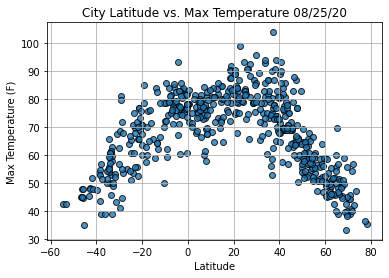

In [15]:
## Visualizations - Basic scatter plots
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            ec="k", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

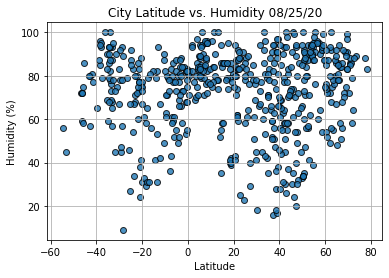

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

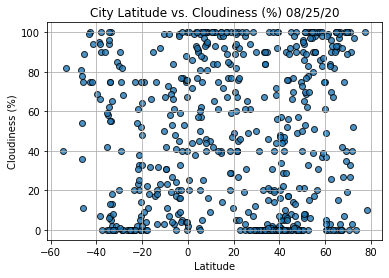

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

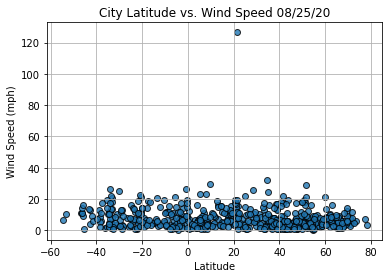

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [60]:
## Plot linear regresstions
#Create a function to perform linear regression on the weather data, plot reg line, print equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values,y_values)
    
    # Calculate the regression line y_values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot reg line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("y_label")
    plt.title(title)
    
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dmitrovsk-Orlovskiy,RU,2020-08-25 22:39:44,52.51,35.15,63.39,56,83,12.19
2,Tasiilaq,GL,2020-08-25 22:39:45,65.61,-37.64,39.20,86,0,5.82
3,Albany,US,2020-08-25 22:39:45,42.60,-73.97,81.00,45,7,5.99
4,Alanya,TR,2020-08-25 22:39:45,36.54,32.00,80.46,52,0,2.37
5,Dublin,US,2020-08-25 22:39:45,37.70,-121.94,87.01,51,0,8.01
6,Chokurdakh,RU,2020-08-25 22:39:45,70.63,147.92,38.93,86,100,4.21
7,Eyl,SO,2020-08-25 22:39:45,7.98,49.82,76.80,76,46,23.47
9,Vorobyevka,RU,2020-08-25 22:39:45,50.65,40.92,64.76,35,86,6.87
10,Dingle,PH,2020-08-25 22:39:45,11.00,122.67,78.30,84,84,3.78
12,Jining,CN,2020-08-25 22:39:46,35.41,116.58,73.40,83,100,9.19


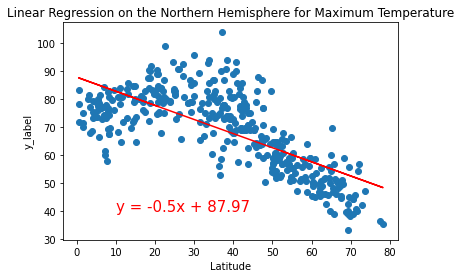

In [51]:
# Linear regression on max temperature for N. Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values, 
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

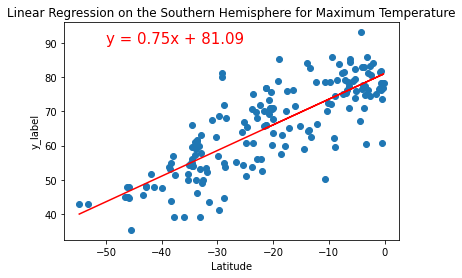

In [54]:
# Linear regression on Max Temp for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

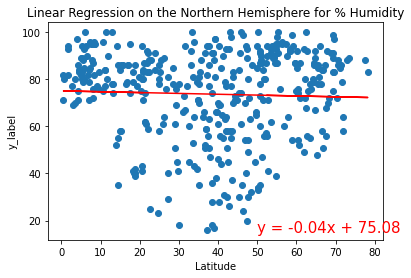

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,15))

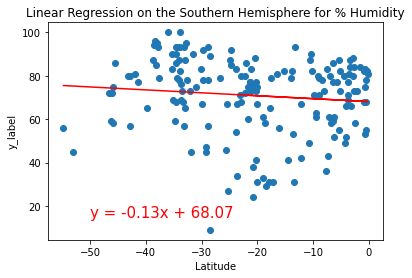

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

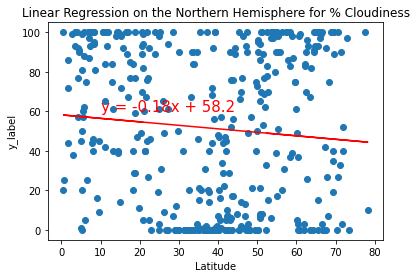

In [66]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", "Cloudiness",(10,60))

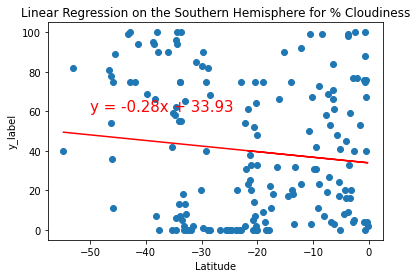

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

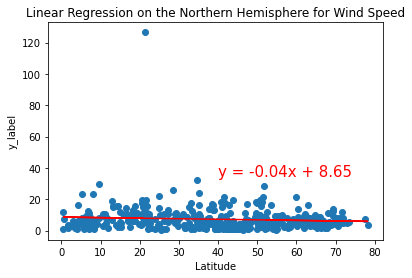

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

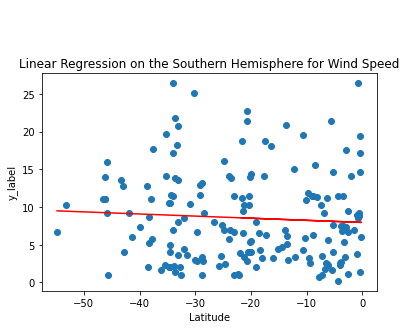

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))